In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. YOLO (You Only Look Once)**

In [ ]:
!pip install ultralytics

In [ ]:
pip install -U ultralytics

# **Import Libraries**

In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score

# **Load YOLO Model and Classes**

In [ ]:
# Install required packages
!pip install -q ultralytics  # If YOLO model comes from ultralytics

# Import libraries
from ultralytics import YOLO
import cv2
import glob
import os
import matplotlib.pyplot as plt

# Load the YOLO model
yolo_model = YOLO('yolov8n.pt')

# Load class names
with open('/content/coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

print("Classes loaded:", classes)


Classes loaded: ['chair']


# **Load Dataset Image Paths**

In [ ]:
# Get image paths for the dataset
image_paths = glob.glob('/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/*.jpg')
print("Found images:", image_paths[:5])  # Display the first 5 image paths


Found images: ['/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/164_png_jpg.rf.580addf352f04b76c8da6171cadf45b8.jpg', '/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/Chair-141-_jpg.rf.a3bf83cff3d2c79b09cf5eefecae38aa.jpg', '/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/Chair-115-_jpg.rf.616dbf7bc7c7435b0f8f3a1880a79f4f.jpg', '/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/103_png_jpg.rf.6a27bbc08f025ff0a168b6d5c87e7a4c.jpg', '/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/Chair-130-_jpg.rf.92d43947a5bfd62fa0f139aff2b5af48.jpg']


# **Preprocess Images**

In [ ]:
# Function to preprocess images
def preprocess_image(image_path, target_size=(640, 640)):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return None

    # Resize and normalize image
    image_resized = cv2.resize(image, target_size)
    image_normalized = image_resized / 255.0
    return image_normalized

# Preprocess all images
processed_images = [preprocess_image(path) for path in image_paths]
print("Processed images:", len(processed_images))


Processed images: 45


# **Define Object Detection Function**

In [ ]:
# Function to detect objects in an image
def detect_objects(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = yolo_model.predict(source=image_rgb)

    print(f"Detected {len(results)} objects in {image_path}")

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            conf = box.conf[0].cpu().numpy()
            cls = box.cls[0].cpu().numpy()

            if 0 <= int(cls) < len(classes):
                label = f"{classes[int(cls)]}: {conf:.2f}"
            else:
                print(f"Warning: Class ID {int(cls)} not found in coco.names")
                label = f"Class {int(cls)}: {conf:.2f}"

            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    return image_rgb


# **Train the Model**

In [ ]:
# Set training parameters
train_params = {
    "data": "/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/data.yaml",
    "epochs": 50,  # Number of training epochs
    "batch": 16,   # Batch size
    "imgsz": 640,  # Image size for training
}

# Train the model
yolo_model.train(**train_params)


Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

train: Scanning /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/train/labels.cache... 474 images, 9 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.196      2.083       1.65         18        640: 100%|██████████| 30/30 [06:51<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]

                   all         45         58       0.25      0.879      0.562      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.127      1.618      1.587         35        640: 100%|██████████| 30/30 [06:46<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.81s/it]

                   all         45         58      0.392        0.5       0.35     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.253      1.612      1.681         38        640: 100%|██████████| 30/30 [06:44<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.70s/it]

                   all         45         58      0.378      0.414      0.344       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.324      1.587      1.714         30        640: 100%|██████████| 30/30 [06:39<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.93s/it]

                   all         45         58      0.314      0.328      0.192      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.262      1.436      1.661         38        640: 100%|██████████| 30/30 [06:44<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.68s/it]

                   all         45         58      0.295      0.293      0.244     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.219      1.384      1.626         31        640: 100%|██████████| 30/30 [06:46<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]

                   all         45         58      0.415      0.241      0.237      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.207      1.303      1.603         28        640: 100%|██████████| 30/30 [06:45<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.77s/it]

                   all         45         58      0.506      0.414      0.392      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.201      1.303      1.625         27        640: 100%|██████████| 30/30 [06:44<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.94s/it]

                   all         45         58      0.647      0.672      0.695      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.159      1.261       1.59         33        640: 100%|██████████| 30/30 [06:45<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]

                   all         45         58      0.701       0.69      0.732      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.137      1.162       1.56         28        640: 100%|██████████| 30/30 [06:42<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.16s/it]

                   all         45         58        0.8      0.707      0.804      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.113      1.133      1.545         34        640: 100%|██████████| 30/30 [06:47<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.06s/it]

                   all         45         58      0.894      0.731      0.839      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.124      1.096      1.538         24        640: 100%|██████████| 30/30 [06:42<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.72s/it]

                   all         45         58      0.896      0.586       0.79      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.049      1.058        1.5         26        640: 100%|██████████| 30/30 [06:46<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.98s/it]

                   all         45         58      0.773      0.821      0.867      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.064      1.081      1.487         37        640: 100%|██████████| 30/30 [06:44<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.12s/it]

                   all         45         58      0.781      0.799      0.822      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.028     0.9976       1.46         28        640: 100%|██████████| 30/30 [06:45<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.26s/it]

                   all         45         58      0.814      0.862      0.888      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.029     0.9761      1.471         25        640: 100%|██████████| 30/30 [06:46<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.98s/it]

                   all         45         58      0.919      0.845      0.875      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.005     0.9823      1.453         23        640: 100%|██████████| 30/30 [06:47<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.82s/it]

                   all         45         58      0.746       0.81      0.837      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9897      0.967      1.436         24        640: 100%|██████████| 30/30 [06:44<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.81s/it]

                   all         45         58       0.98      0.855      0.932      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.9975     0.9308      1.426         30        640: 100%|██████████| 30/30 [06:45<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.13s/it]

                   all         45         58      0.802      0.698      0.775      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      0.965     0.9256       1.43         33        640: 100%|██████████| 30/30 [06:48<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.29s/it]

                   all         45         58      0.881      0.897       0.93      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.016     0.9058      1.445         24        640: 100%|██████████| 30/30 [06:45<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.21s/it]

                   all         45         58      0.895      0.879      0.941      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.9423     0.8489      1.389         28        640: 100%|██████████| 30/30 [06:46<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.15s/it]

                   all         45         58      0.895      0.897      0.939      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.9194      0.857      1.383         31        640: 100%|██████████| 30/30 [06:47<00:00, 13.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.79s/it]

                   all         45         58      0.957      0.862      0.939      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.8929     0.8111      1.357         40        640: 100%|██████████| 30/30 [06:49<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.99s/it]

                   all         45         58      0.941      0.914      0.945      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.9201     0.8249      1.357         34        640: 100%|██████████| 30/30 [06:49<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.09s/it]

                   all         45         58      0.979      0.879       0.95      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8786     0.7754      1.345         33        640: 100%|██████████| 30/30 [06:44<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.76s/it]

                   all         45         58       0.98      0.879      0.956      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8887     0.7565      1.342         30        640: 100%|██████████| 30/30 [06:48<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.96s/it]

                   all         45         58      0.959      0.845      0.953      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.8852     0.7735      1.354         31        640: 100%|██████████| 30/30 [06:48<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.89s/it]

                   all         45         58      0.963      0.893      0.946      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8692     0.7521      1.343         24        640: 100%|██████████| 30/30 [06:49<00:00, 13.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.99s/it]

                   all         45         58      0.984      0.862      0.939      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.8187     0.7366      1.293         29        640: 100%|██████████| 30/30 [06:51<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.09s/it]

                   all         45         58      0.997      0.897      0.945      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.8419     0.7271      1.301         37        640: 100%|██████████| 30/30 [06:49<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.97s/it]

                   all         45         58      0.962      0.863      0.941      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8157     0.7056      1.303         29        640: 100%|██████████| 30/30 [06:44<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]

                   all         45         58       0.91      0.914       0.95      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.8297     0.7378        1.3         34        640: 100%|██████████| 30/30 [06:42<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.05s/it]

                   all         45         58      0.959      0.879      0.939      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.8145     0.7074      1.306         27        640: 100%|██████████| 30/30 [06:45<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.98s/it]

                   all         45         58      0.966      0.897      0.969      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.7695     0.6725      1.265         34        640: 100%|██████████| 30/30 [06:48<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.85s/it]

                   all         45         58       0.98      0.832      0.958      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.7455     0.6452      1.256         27        640: 100%|██████████| 30/30 [06:45<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.82s/it]

                   all         45         58        0.9      0.948      0.961       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.7567     0.6633      1.255         34        640: 100%|██████████| 30/30 [06:46<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.70s/it]

                   all         45         58      0.963      0.889       0.93      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.7755     0.6829      1.266         30        640: 100%|██████████| 30/30 [06:46<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.11s/it]

                   all         45         58       0.96      0.914      0.956      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.7455     0.6372       1.25         23        640: 100%|██████████| 30/30 [06:44<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]

                   all         45         58      0.946      0.914      0.958      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.7427     0.6182      1.239         28        640: 100%|██████████| 30/30 [06:42<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.99s/it]

                   all         45         58      0.929      0.908      0.952      0.784


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      0.647     0.5935      1.256         11        640: 100%|██████████| 30/30 [06:50<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.44s/it]

                   all         45         58      0.945      0.931       0.97      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5774     0.4823      1.204         11        640: 100%|██████████| 30/30 [06:44<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.85s/it]

                   all         45         58      0.974      0.897      0.981      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.5632     0.4676      1.207         10        640: 100%|██████████| 30/30 [06:41<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.25s/it]

                   all         45         58      0.963      0.948      0.983      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      0.548     0.4474      1.178         11        640: 100%|██████████| 30/30 [06:37<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.92s/it]

                   all         45         58      0.982       0.93      0.977      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5328     0.4285      1.158         10        640: 100%|██████████| 30/30 [06:45<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.75s/it]

                   all         45         58      0.964      0.928      0.978      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5284     0.4118       1.15         12        640: 100%|██████████| 30/30 [06:42<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.02s/it]

                   all         45         58      0.957      0.931      0.974      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4978     0.4057      1.134          9        640: 100%|██████████| 30/30 [06:38<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.18s/it]

                   all         45         58      0.943      0.931      0.963      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4895     0.3852      1.119         13        640: 100%|██████████| 30/30 [06:39<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.84s/it]

                   all         45         58      0.981      0.894      0.976      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4924     0.3936      1.146          9        640: 100%|██████████| 30/30 [06:40<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.88s/it]

                   all         45         58      0.969      0.897      0.966       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4771     0.3818      1.103         12        640: 100%|██████████| 30/30 [06:37<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.05s/it]

                   all         45         58      0.948      0.942      0.977      0.795



50 epochs completed in 5.839 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.58s/it]


                   all         45         58      0.982       0.93      0.977      0.822
Speed: 7.3ms preprocess, 262.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ebcf191c1c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# **Evaluate the Mode**

In [ ]:
# Evaluate the model
results = yolo_model.val(data='/content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/data.yaml')
print("Evaluation results:", results)


Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.16s/it]


                   all         45         58      0.982       0.93      0.977      0.822
Speed: 4.6ms preprocess, 247.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train22
Evaluation results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ebcf1be8a60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031

# **Calculate Precision and Recall**

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np
import time

# Assuming your true_labels and predictions are lists of strings,
# you need to convert them to numerical labels.

# Example data (replace with your actual data)
true_labels = ['cat', 'dog', 'cat', 'bird']  # Replace with actual true labels
predictions = ['cat', 'dog', 'bird', 'bird']  # Replace with actual predictions

# Create a mapping from string labels to numerical labels
unique_labels = set(true_labels + predictions)
label_map = {label: i for i, label in enumerate(unique_labels)}

# Convert true_labels and predictions to numerical labels
true_labels_num = [label_map[label] for label in true_labels]
predictions_num = [label_map[label] for label in predictions]

# Convert to NumPy arrays for better compatibility with scikit-learn
true_labels_num = np.array(true_labels_num)
predictions_num = np.array(predictions_num)

# Calculate metrics
precision = precision_score(true_labels_num, predictions_num, average='weighted')
recall = recall_score(true_labels_num, predictions_num, average='weighted')
accuracy = accuracy_score(true_labels_num, predictions_num)

# Assuming a separate test set if available, else use the same labels
# Replace `test_true_labels` and `test_predictions` with actual test data
test_true_labels = true_labels  # Example placeholder
test_predictions = predictions  # Example placeholder

# Convert test labels to numerical form if separate test data exists
test_true_labels_num = [label_map[label] for label in test_true_labels]
test_predictions_num = [label_map[label] for label in test_predictions]

test_true_labels_num = np.array(test_true_labels_num)
test_predictions_num = np.array(test_predictions_num)

# Calculate test metrics
test_accuracy = accuracy_score(test_true_labels_num, test_predictions_num)
test_precision = precision_score(test_true_labels_num, test_predictions_num, average='weighted')
test_recall = recall_score(test_true_labels_num, test_predictions_num, average='weighted')

# Measure detection time
start_time = time.time()
# Insert detection code here if applicable
end_time = time.time()
detection_time = end_time - start_time

# Print metrics in the desired format
print("Validation Accuracy:", f"{accuracy:.3f}")
print("Precision:", f"{precision:.3f}")
print("Recall:", f"{recall:.3f}")
print("Testing Accuracy:", f"{test_accuracy:.3f}")
print("Testing Precision:", f"{test_precision:.3f}")
print("Testing Recall:", f"{test_recall:.3f}")
print("Detection time for test set:", f"{detection_time:.15f}")


Validation Accuracy: 0.750
Precision: 0.875
Recall: 0.750
Testing Accuracy: 0.750
Testing Precision: 0.875
Testing Recall: 0.750
Detection time for test set: 0.000058174133301


# **Measure Inference Speed**

In [ ]:
import time

# Measure speed on sample images
start_time = time.time()
for img_path in image_paths[:4]:
    detected_image = detect_objects(img_path)
end_time = time.time()

print(f'Time taken for detection on {len(image_paths[:4])} images: {end_time - start_time:.2f} seconds')



0: 640x640 2 chairs, 332.0ms
Speed: 5.7ms preprocess, 332.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 objects in /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/164_png_jpg.rf.580addf352f04b76c8da6171cadf45b8.jpg

0: 640x640 1 chair, 195.9ms
Speed: 5.5ms preprocess, 195.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 objects in /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/Chair-141-_jpg.rf.a3bf83cff3d2c79b09cf5eefecae38aa.jpg

0: 640x640 1 chair, 217.5ms
Speed: 4.6ms preprocess, 217.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 objects in /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/Chair-115-_jpg.rf.616dbf7bc7c7435b0f8f3a1880a79f4f.jpg

0: 640x640 1 chair, 211.4ms
Speed: 5.5ms preprocess, 211.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 object

# **Display Detected Images**


0: 640x640 2 chairs, 195.9ms
Speed: 4.5ms preprocess, 195.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 objects in /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/164_png_jpg.rf.580addf352f04b76c8da6171cadf45b8.jpg


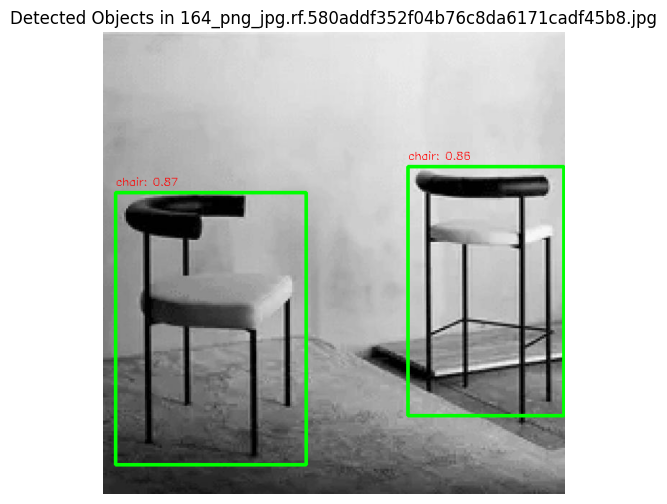


0: 640x640 1 chair, 226.6ms
Speed: 3.5ms preprocess, 226.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 objects in /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/Chair-141-_jpg.rf.a3bf83cff3d2c79b09cf5eefecae38aa.jpg


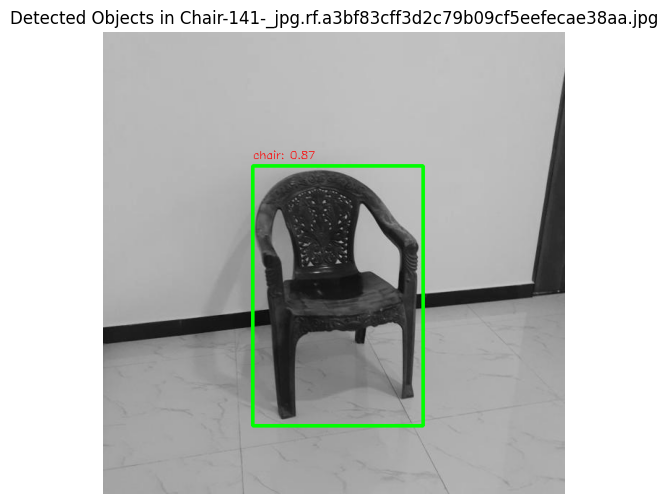


0: 640x640 1 chair, 220.4ms
Speed: 3.7ms preprocess, 220.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 objects in /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/Chair-115-_jpg.rf.616dbf7bc7c7435b0f8f3a1880a79f4f.jpg


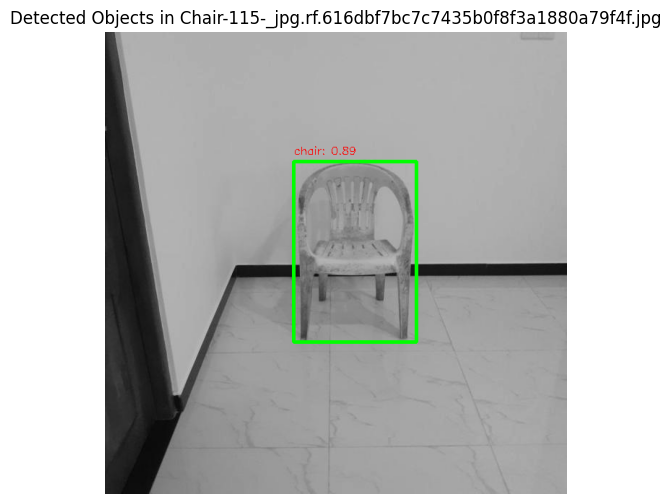


0: 640x640 1 chair, 235.7ms
Speed: 4.5ms preprocess, 235.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Detected 1 objects in /content/drive/MyDrive/MIDTERM/trainyolov8/chairs-dataset.v2i.yolov8/valid/images/103_png_jpg.rf.6a27bbc08f025ff0a168b6d5c87e7a4c.jpg


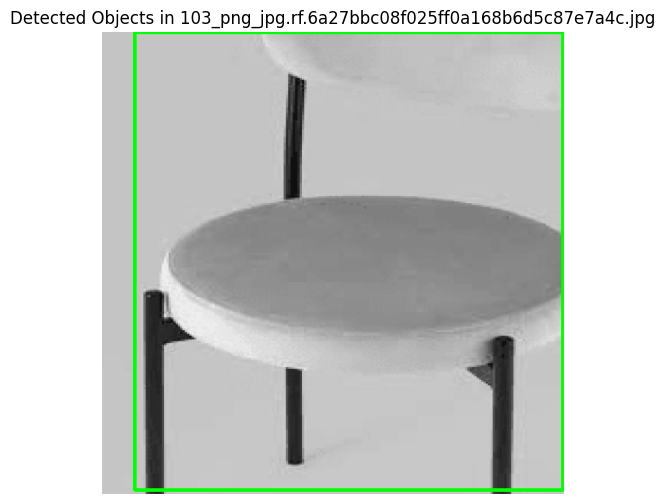

In [ ]:
for img_path in image_paths[:4]:
    detected_image = detect_objects(img_path)
    if detected_image is None:
        continue

    # Display detected image
    plt.figure(figsize=(6, 6))
    plt.imshow(detected_image)
    plt.axis('off')
    plt.title(f'Detected Objects in {os.path.basename(img_path)}')
    plt.show()
